# **Pure $\lambda$-Calculus**

[The deatailed script](https://www.mathcha.io/editor/Pvvz5UZ1t7ktL6sZJYp19sZnX9vVserJMEKhJvvMx7)

## **Variables**

The code below models variables.

Using the `natgen()` generator in this code ensures that a fresh variable is returned in response to each constructor call.

## Import dependencies

In [1]:
import random
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
from deap import tools, base, creator
import seaborn as sns

sys.path.append('../')
from calculus.term import *
from calculus.strategy import *
from calculus.generation import gen_filtered_lambda_terms

from calculus_utils.drawing import *
from calculus_utils.algorithms import *

from vd_env.lambda_env import LambdaEnv
from vd_env.run_greedy_policy import run_greedy_policy
from vd_env.run_e_greedy_policy import run_e_greedy_policy

In [2]:
UPLIMIT = 60
DOWNLIMIT = 50
LAMBDA_TERM_COUNT = 100
RANDOM_AVERAGE_COUNT = 20

terms, stepsLO = gen_filtered_lambda_terms(
    count_terms=LAMBDA_TERM_COUNT, down_vertices_limit=DOWNLIMIT,
    up_vertices_limit=UPLIMIT)

countVertices = list(map(lambda term: term.verticesNumber, terms))
countRedexes = list(map(lambda term: len(term.redexes), terms))

print(f"number of lambda terms {len(terms)}")
print("number of vertices= {}".format(countVertices))
print("number of redexes= {}".format(countRedexes))

print("number of steps to normalize using LO strategy= {}".format(stepsLO))
print(f'number of terms with normal form {len(terms)}')

print("number of steps to normalize using LO strategy= {}".format(stepsLO))

stepsRI = [term.normalize(RightmostInnermostStrategy())[1] for term in terms]
print("number of steps to normalize using RI strategy= {}".format(stepsRI))

stepsRand = [sum([term.normalize(RandomStrategy())[1] for i in range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT for
             term in terms]
print("number of steps to normalize using Random strategy= {}".format(stepsRand))

Generated terms: 281
LO strategy applying
Remove unormalized terms
Left 100 normalizeble terms
number of lambda terms 100
number of vertices= [53, 52, 57, 53, 58, 57, 56, 52, 58, 51, 54, 57, 56, 51, 58, 56, 53, 54, 53, 54, 56, 56, 56, 56, 58, 52, 55, 51, 51, 54, 55, 52, 59, 55, 59, 51, 55, 55, 57, 55, 58, 56, 52, 51, 58, 51, 57, 56, 55, 52, 56, 55, 53, 55, 57, 53, 52, 51, 55, 59, 52, 57, 59, 51, 53, 52, 53, 59, 52, 56, 51, 57, 59, 57, 54, 54, 57, 58, 57, 53, 58, 53, 55, 55, 52, 54, 51, 51, 52, 52, 55, 54, 51, 52, 51, 51, 53, 54, 58, 54]
number of redexes= [4, 4, 6, 4, 8, 7, 5, 8, 3, 6, 5, 6, 4, 9, 5, 8, 7, 5, 7, 4, 7, 7, 7, 5, 2, 7, 4, 4, 4, 6, 2, 4, 3, 6, 4, 6, 7, 6, 4, 6, 4, 8, 6, 7, 5, 6, 8, 5, 6, 7, 5, 10, 5, 4, 8, 6, 5, 4, 5, 8, 6, 8, 1, 2, 5, 4, 4, 5, 5, 7, 6, 5, 4, 6, 5, 7, 5, 8, 5, 9, 3, 3, 4, 5, 8, 5, 8, 4, 7, 5, 7, 5, 5, 8, 4, 3, 3, 2, 8, 9]
number of steps to normalize using LO strategy= [4, 7, 12, 6, 1, 27, 10, 10, 4, 3, 11, 10, 11, 16, 5, 10, 7, 14, 23, 17, 8, 2, 6, 3, 2, 

In [3]:
print('max cound LO: {}'.format(max(stepsLO)))
print('max cound RI: {}'.format(max(stepsRI)))
print('max cound Rand: {}'.format(max(stepsRand)))

max cound LO: 98
max cound RI: inf
max cound Rand: inf


In [4]:
max_count_steps_rlenv = 100
strategies_env = [LeftmostOutermostStrategy(),
                  RightmostOutermostStrategy()]

explore_ep = 10  # total 10 * 2 (strat) = 20
epsilon = .1

In [5]:
lambda_env = LambdaEnv(strategies=strategies_env,
                       lambda_terms=terms,
                       max_step_term=max_count_steps_rlenv,
                       count_terms=LAMBDA_TERM_COUNT)

lambda_env, rewards_greedy = run_greedy_policy(lambda_env,
                                               exploration=explore_ep,
                                               max_term_reward=max_count_steps_rlenv)

In [6]:
lambda_env = LambdaEnv(strategies=strategies_env,
                       lambda_terms=terms,
                       max_step_term=max_count_steps_rlenv,
                       count_terms=LAMBDA_TERM_COUNT)

lambda_env, rewards_e_greedy = run_e_greedy_policy(lambda_env,
                                                   exploration=explore_ep,
                                                   max_term_reward=max_count_steps_rlenv,
                                                   epsilon=epsilon)

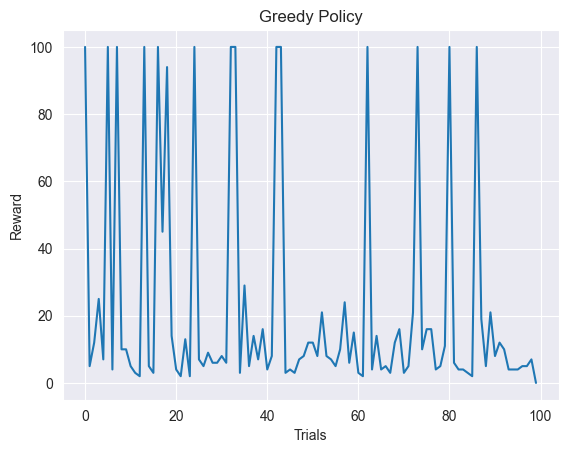

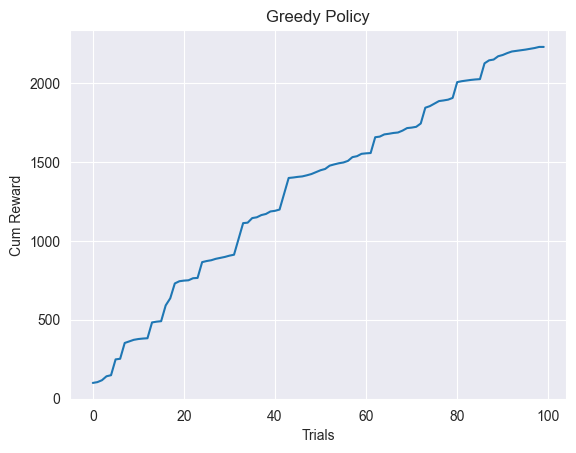

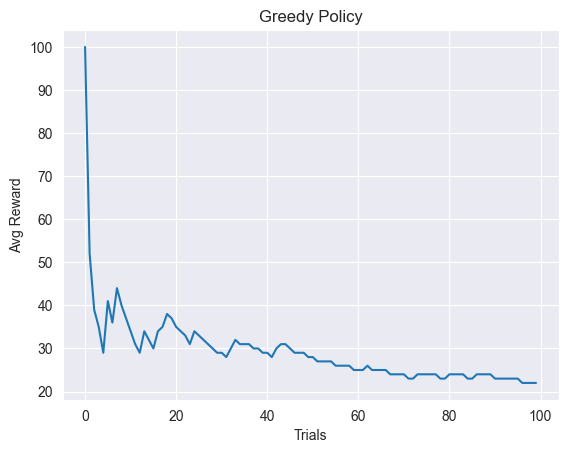

In [11]:
rewards_greedy = [max_count_steps_rlenv - rew for rew in rewards_greedy]

plt.plot(rewards_greedy)
plt.title('Greedy Policy')
plt.xlabel('Trials')
plt.ylabel('Reward')
plt.show()

cum_greedy_rewards = np.cumsum(rewards_greedy)
plt.plot(cum_greedy_rewards)
plt.title('Greedy Policy')
plt.xlabel('Trials')
plt.ylabel('Cum Reward')
plt.show()

for i in range(len(cum_greedy_rewards)):
    cum_greedy_rewards[i] /= i + 1
plt.plot(cum_greedy_rewards)
plt.title('Greedy Policy')
plt.xlabel('Trials')
plt.ylabel('Avg Reward')
plt.show()

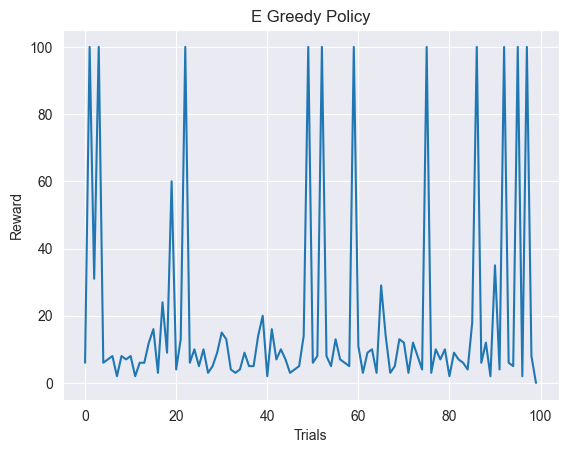

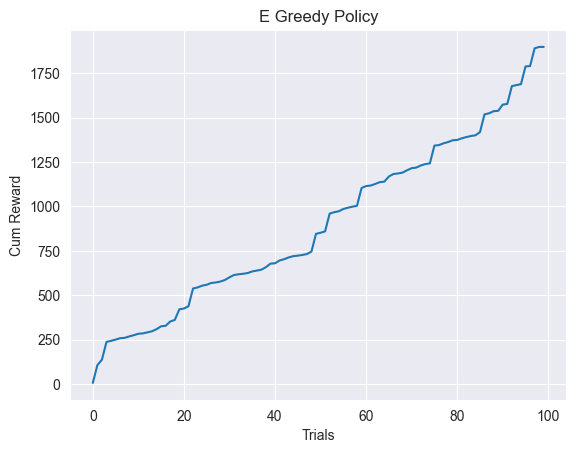

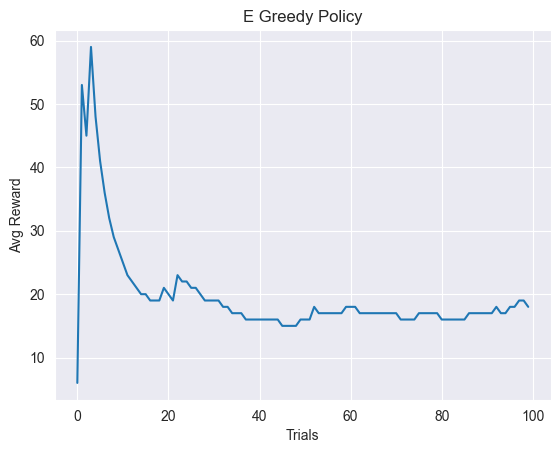

In [12]:
rewards_e_greedy = [max_count_steps_rlenv - rew for rew in rewards_e_greedy]

plt.plot(rewards_e_greedy)
plt.title('E Greedy Policy')
plt.xlabel('Trials')
plt.ylabel('Reward')
plt.show()

cum_e_gr_rewards = np.cumsum(rewards_e_greedy)
plt.plot(cum_e_gr_rewards)
plt.title('E Greedy Policy')
plt.xlabel('Trials')
plt.ylabel('Cum Reward')
plt.show()

for i in range(len(cum_e_gr_rewards)):
    cum_e_gr_rewards[i] /= i + 1
plt.plot(cum_e_gr_rewards)
plt.title('E Greedy Policy')
plt.xlabel('Trials')
plt.ylabel('Avg Reward')
plt.show()

In [15]:
import pandas as pd
from fitter import Fitter, get_common_distributions
import matplotlib.pyplot as plt


def draw_hist_(data):
    steps = [x for x in data if x != float('inf')]

    distributions = get_common_distributions()
    distributions.remove('expon')
    distributions.remove('cauchy')
    f = Fitter(steps, distributions=distributions)
    f.fit()
    summary = f.summary()
    distribution = f.get_best(method='sumsquare_error')

    print('==============')
    print(f'number of not normalized terms: {len(data) - len(steps)}')
    print(summary)
    print(distribution)
    print(f'Norm distribution: {f.fitted_param["norm"]}')
    print('==============')
    plt.xlabel('Number of reduction steps')
    plt.show()

    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()
    mu, sigma = f_ln.fitted_param["norm"]
    print(f'Log Norm distribution params: ({mu}, {sigma}); expected value = {np.e ** (mu + (sigma ** 2) / 2)}')

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 24.02it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.039571  1133.143806 -769.666817     inf      0.130573   
chi2             0.048648  1074.087170 -749.016466     inf      0.238461   
gamma            0.052774  1082.920354 -740.875058     inf      0.193972   
exponpow         0.057481  1041.222073 -732.331216     inf      0.255174   
powerlaw         0.060251   977.738576 -727.625246     inf      0.329949   

             ks_pvalue  
lognorm   6.023236e-02  
chi2      1.732428e-05  
gamma     9.030885e-04  
exponpow  3.149393e-06  
powerlaw  3.354036e-10  
{'lognorm': {'s': 1.1881527716203601, 'loc': -0.2315345867836362, 'scale': 10.168205223055907}}
Norm distribution: (22.28, 33.14003017500136)


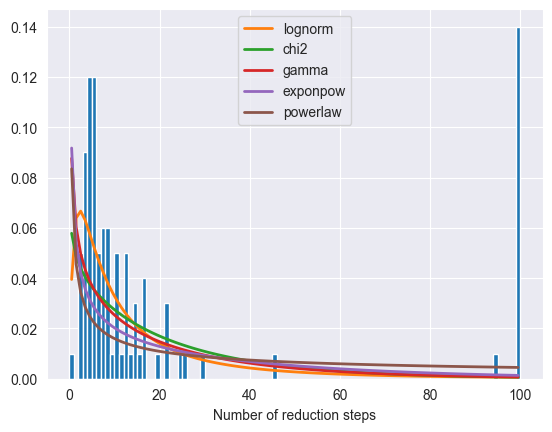

ValueError: autodetected range of [-inf, 4.605170185988092] is not finite

In [18]:
draw_hist_(rewards_greedy)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 23.47it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.025421  1167.841866 -813.918536     inf      0.143343   
chi2             0.038910  1113.289208 -771.352616     inf      0.226231   
gamma            0.044079  1082.478344 -758.878318     inf      0.239559   
rayleigh         0.050313  1070.969780 -750.256493     inf      0.402002   
exponpow         0.050627  1084.513961 -745.028037     inf      0.234663   

             ks_pvalue  
lognorm   2.953748e-02  
chi2      5.588027e-05  
gamma     1.554706e-05  
rayleigh  4.198903e-15  
exponpow  2.509726e-05  
{'lognorm': {'s': 1.0835828296236478, 'loc': -0.2843810406882672, 'scale': 9.501052958411808}}
Norm distribution: (18.99, 29.523040155105978)


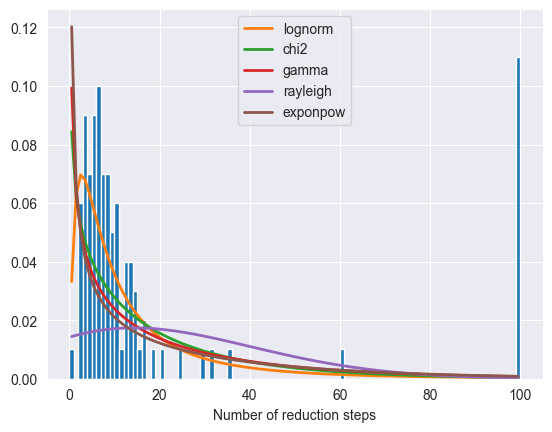

ValueError: autodetected range of [-inf, 4.605170185988092] is not finite

In [19]:
draw_hist_(rewards_e_greedy)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 25.67it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.007145  1358.097997 -940.830850     inf      0.071406   
rayleigh         0.022488  2117.519228 -830.782577     inf      0.242359   
exponpow         0.024756  1191.685653 -816.570170     inf      0.188029   
norm             0.028992  2173.541753 -805.381157     inf      0.228248   
powerlaw         0.034886  1006.301361 -782.269775     inf      0.349644   

             ks_pvalue  
lognorm   6.609514e-01  
rayleigh  1.176770e-05  
exponpow  1.437289e-03  
norm      4.627051e-05  
powerlaw  1.966613e-11  
{'lognorm': {'s': 0.9033702444972623, 'loc': 0.15999964609725725, 'scale': 6.668157815447543}}
Norm distribution: (10.32, 12.516293381029387)


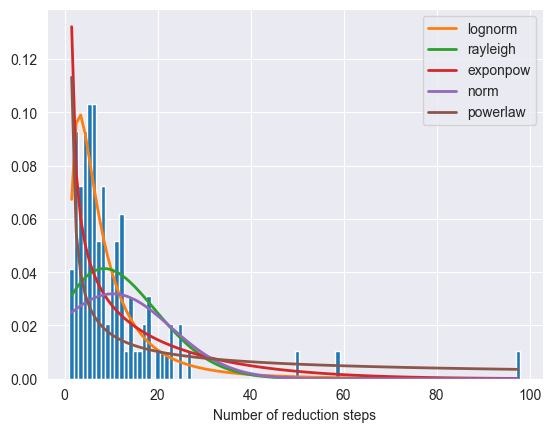

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 21.56it/s]


Log Norm distribution params: (1.9321728531051017, 0.8730274807595393); expected value = 10.107334457213225


Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 29.91it/s]


number of not normalized terms: 2
          sumsquare_error         aic         bic  kl_div  ks_statistic  \
lognorm          0.705820  784.502686 -469.714679     inf      0.080476   
gamma            0.706113  783.114199 -469.674011     inf      0.075434   
rayleigh         0.710439  796.376249 -473.660420     inf      0.092095   
norm             0.724472  843.900901 -471.743495     inf      0.124462   
powerlaw         0.795193  686.537381 -458.030637     inf      0.293347   

             ks_pvalue  
lognorm   5.232965e-01  
gamma     6.055281e-01  
rayleigh  3.550261e-01  
norm      8.803696e-02  
powerlaw  5.747976e-08  
{'lognorm': {'s': 0.3734141593027095, 'loc': -3.7783078394713256, 'scale': 12.487454068880375}}
Norm distribution: (9.60204081632653, 5.050237003770456)


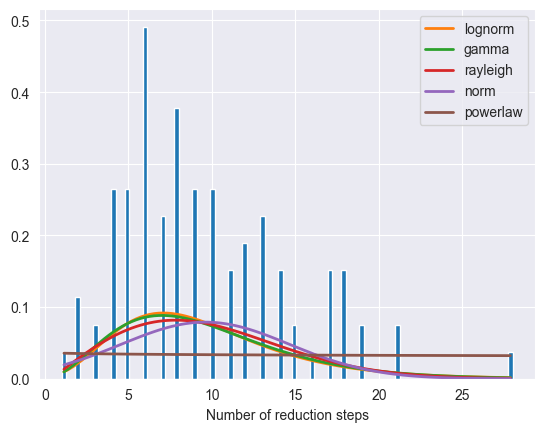

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 23.59it/s]


Log Norm distribution params: (2.110851079764012, 0.5842494802214864); expected value = 9.79159933486793


Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 25.88it/s]


number of not normalized terms: 2
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.022400  1330.634020 -807.846077     inf      0.071524   
chi2             0.026575  1463.087320 -791.094972     inf      0.093689   
rayleigh         0.038208  1945.633671 -760.099486     inf      0.222259   
norm             0.044550  2026.783307 -745.048480     inf      0.204603   
exponpow         0.046588  1378.621733 -736.080188     inf      0.191548   

          ks_pvalue  
lognorm    0.670843  
chi2       0.334917  
rayleigh   0.000098  
norm       0.000449  
exponpow   0.001268  
{'lognorm': {'s': 0.7228591578692938, 'loc': 0.0775912984911735, 'scale': 8.43488306472978}}
Norm distribution: (11.254081632653062, 10.947005166518608)


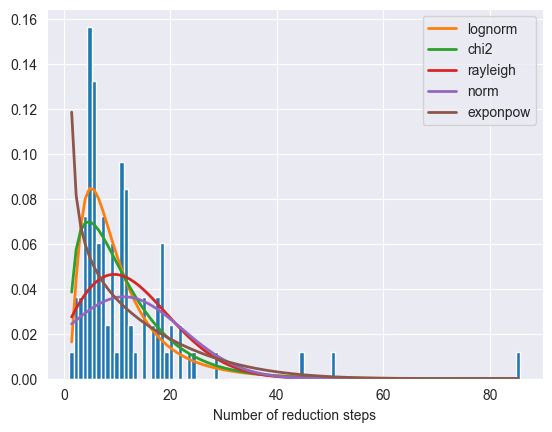

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 25.88it/s]

Log Norm distribution params: (2.1441630382334367, 0.7144637245990413); expected value = 11.016479026755457


In [17]:
draw_hist(stepsLO)
draw_hist(stepsRI)
draw_hist(stepsRand)

In [ ]:
STRATEGIES = [LeftmostOutermostStrategy(), RightmostInnermostStrategy(), LeftmostInnermostStrategy(),
              RightmostOutermostStrategy(), RandomStrategy()]

BOUNDS_LOW = [0.1, 0.0, 0.0, 0.0]
BOUNDS_HIGH = [1.0, 1.0, 1.0, 1.0, ]

NUM_OF_PARAMS = len(BOUNDS_HIGH)

# Genetic Algorithm constants:
POPULATION_SIZE = 20
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.3  # probability for mutating an individual
MAX_GENERATIONS = 7
HALL_OF_FAME_SIZE = 4
CROWDING_FACTOR = 10  # crowding factor for crossover and mutation

toolbox = base.Toolbox()

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMin)

# define the hyperparameter attributes individually:
for i in range(NUM_OF_PARAMS):
    # "hyperparameter_0", "hyperparameter_1", ...
    toolbox.register("hyperparameter_" + str(i), random.uniform, BOUNDS_LOW[i], BOUNDS_HIGH[i])

# create a tuple containing an attribute generator for each param searched:
hyperparameters = ()
for i in range(NUM_OF_PARAMS):
    hyperparameters = hyperparameters + (toolbox.__getattribute__("hyperparameter_" + str(i)),)


# create the individual operator to fill up an Individual instance:
def individual_creator() -> creator.Individual:
    indv = [0 for _ in range(NUM_OF_PARAMS)]
    for i in range(NUM_OF_PARAMS):
        indv[i] = random.uniform(BOUNDS_LOW[i], 1 - sum(indv))
    return creator.Individual(indv)


# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, individual_creator)


# fitness calculation
def fitness(individual):
    p = individual.copy()
    p.append(max(0, 1 - sum(individual)))
    steps = [sum([term.normalize(MixedStrategy(STRATEGIES, p))[1] for i in
                  range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT for term in terms]
    steps = list(filter(lambda x: x != float('inf'), steps))

    distributions = get_common_distributions()
    distributions.remove('expon')
    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()

    mu, sigma = f_ln.fitted_param["norm"]
    result = np.e ** (mu + (sigma ** 2) / 2)
    print("expected number of steps to normalize using Mixed strategy= {}".format(result))
    if 1 - sum(individual) < 0:
        result += 100 * (sum(individual) - 1)
    return result,


toolbox.register("evaluate", fitness)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR,
                 indpb=1.0 / NUM_OF_PARAMS)

# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# perform the Genetic Algorithm flow with hof feature added:
population, logbook = eaSimpleWithElitism(population,
                                          toolbox,
                                          cxpb=P_CROSSOVER,
                                          mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS,
                                          stats=stats,
                                          halloffame=hof,
                                          verbose=True)

# print best solution found:
print("- Best solution is: ")
print("p = ", hof.items[0])

# extract statistics:
maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")
# plot statistics:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average fitness over Generations')
plt.show()

In [ ]:
p = hof.items[0]
p.append(max(0, 1 - sum(p)))
MixedStrategySteps = [
    sum([term.normalize(MixedStrategy(STRATEGIES, p))[1] for i in range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT
    for term in terms]
draw_hist(MixedStrategySteps)

In [ ]:
p = [0.98, 0.005, 0.005, 0.005, 0.005]
steps = [
    sum([term.normalize(MixedStrategy(STRATEGIES, p))[1] for i in range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT
    for term in terms]
draw_hist(steps)

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
ax0, ax1, ax2, ax3 = axes.flatten()
draw_2d_distribution(ax0, countVertices, countRedexes, 'Vertices number', 'Redexes number')
draw_2d_strategy_distribution(ax1, stepsLO, stepsRI, 'Leftmost outermost strategy', 'Rightmost inermost strategy')
draw_2d_strategy_distribution(ax2, stepsLO, stepsRand, 'Leftmost outermost strategy', 'Random strategy')
draw_2d_strategy_distribution(ax3, stepsRI, stepsRand, 'Rightmost inermost strategy', 'Random strategy')
plt.show()

In [ ]:
colors = ['lime', 'blue', 'red', 'orange']
labels = ['Leftmost outermost', 'Rightmost inermost', 'Uniformly random', 'Mixed']
n = 20
draw_plot(stepsLO[10:n], stepsRI[10:n], stepsRand[10:n], MixedStrategySteps[10:n], labels, colors)

In [ ]:
terms_dict = {i: [] for i in range(DOWNLIMIT, UPLIMIT)}

for i, term in enumerate(terms):
    terms_dict[term.verticesNumber].append((term, {'LO': stepsLO[i], 'RI': stepsRI[i], 'Rand': stepsRand[i]}))

average_term_data = dict()
for verticesNumber, data in terms_dict.items():
    data_without_inf = [d[1] for d in data if
                        d[1]['LO'] != float('inf') and d[1]['RI'] != float('inf') and d[1]['Rand'] != float('inf')]
    avgLO, avgRI, avgRand = 0, 0, 0
    for d in data_without_inf:
        avgLO += d['LO']
        avgRI += d['RI']
        avgRand += d['Rand']

    count = len(data_without_inf)
    if count != 0:
        average_term_data[verticesNumber] = {'LO': avgLO / count, 'RI': avgRI / count, 'Rand': avgRand / count}

plt.figure(figsize=(20, 15))
ax = plt.gca()
ax.plot(list(average_term_data.keys()), [data['LO'] for i, data in average_term_data.items()], color='blue', label='LO')
ax.plot(list(average_term_data.keys()), [data['RI'] for i, data in average_term_data.items()], color='lime', label='RI')
ax.plot(list(average_term_data.keys()), [data['Rand'] for i, data in average_term_data.items()], color='red',
        label='Rand')
ax.set(title='Distribution',
       xlabel='Vertices number',
       ylabel='Strategy steps number')
ax.legend(prop={'size': 10})

plt.show()

## TESTS

In [ ]:
x, y, z = Var(), Var(), Var()
X, Z = Atom(x), Atom(z)
XXX = Application(Application(X, X), X)
XZ = Application(X, Z)
T = Application(Abstraction(x, XXX),
                Abstraction(x, Application(Abstraction(y, Z),
                                           XZ
                                           ))
                )

print(T)
for var, item in T._vars.items():
    print("\t{}".format(var), end=": ")
    print(item)

In [ ]:
x, y, z, w, v = Var(), Var(), Var(), Var(), Var()
# (λx.(λy.( ((λz.(y z)) ((λw.w) x)) v )))
lambdaTerm = Abstraction(x,
                         Abstraction(y,
                                     Application(
                                         Application(
                                             Abstraction(z, Application(Atom(y), Atom(z))),
                                             Application(Abstraction(w, Atom(w)), Atom(w))),
                                         Atom(v))))


def testTerm():
    assert (len(lambdaTerm.redexes) == 2)
    assert (lambdaTerm.verticesNumber == 13)

    subterm = Application(Atom(y), Atom(z))
    assert (lambdaTerm.subterm(1) == lambdaTerm)
    assert (lambdaTerm.subterm(6) == subterm)
    assert (lambdaTerm.setSubterm(1, subterm) == subterm)

    assert (lambdaTerm._updateBoundVariables().verticesNumber == lambdaTerm.verticesNumber)
    assert (len(lambdaTerm._updateBoundVariables().redexes) == len(lambdaTerm.redexes))

    strategy = LeftmostOutermostStrategy()
    assert (len(lambdaTerm._betaConversion(strategy).redexes) == 1)
    assert (lambdaTerm._betaConversion(strategy).verticesNumber == 10)

    assert (len(lambdaTerm.normalize(strategy)[0].redexes) == 0)
    assert (lambdaTerm.normalize(strategy)[1] == 2)


def testStrategy():
    strategy = LeftmostOutermostStrategy()
    assert (strategy.redexIndex(lambdaTerm) == 4)


testTerm()
testStrategy()

In [ ]:
stepsLOWithoutTail = [x for x in stepsLO if x < 150]
draw_hist(stepsLOWithoutTail)

In [ ]:
stepsLOWithoutTail = [x for x in stepsLO if x < 150]
draw_hist(stepsLOWithoutTail)